<a href="https://colab.research.google.com/github/aloksingh43/-The-Sparks-Foundation---GRIP/blob/main/TASK_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation**

Author : **Alok Singh**

Language : Python

IDE : **Colab notebooks**

Github Link : https://github.com/dk208208/The-Sparks-Foundation---GRIP

**TASK 1**

## **Problem Statement** 

# To Predict the percentage of marks of the students based on the number of hours they studied

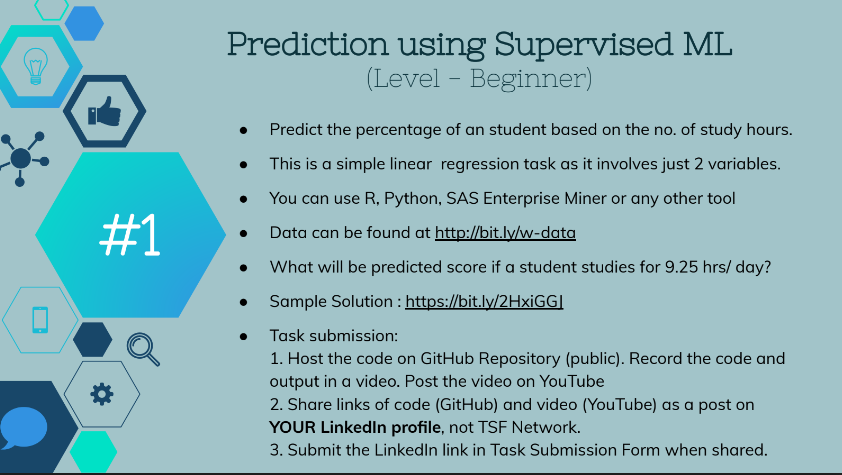

# **Let's start**

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings

## Importing Dataset

In [2]:
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(path )

## Get information about data

In [3]:
# Top five rows of our dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Bottom five rows of our dataset
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# number of rows and columns in our dataset
dataset.shape

(25, 2)

In [6]:
# columns name of our dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# data type of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# some important description of our dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Check null values

In [9]:
null_values_in_data=dataset.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

Hours     0
Scores    0
dtype: int64


There is no any null values in our dataset

In [10]:
# Check there is any duplicate row
len(dataset[dataset.duplicated()])

0

There is no any duplicate row in our dataset                                                                                                                                                                                                                                                                                         

.

## Data Visualization

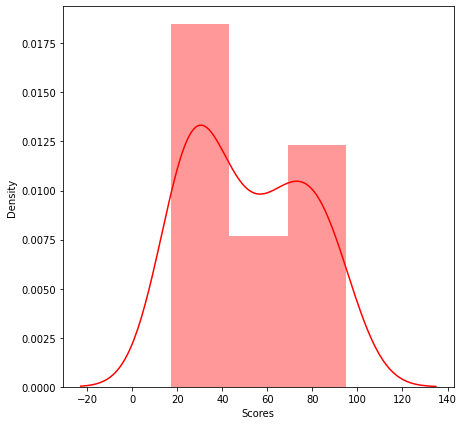

In [11]:
# Check distribution of our Dependent variable
warnings.filterwarnings('ignore')
plt.figure(figsize=(7,7))
sns.distplot(dataset['Scores'],color="r");

Here we can see our dependent variable is normal distributed 

.

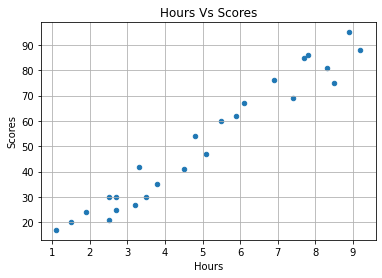

In [12]:
# Plot a scatter plot between Hour and Scores
dataset.plot(kind='scatter',x='Hours',y='Scores')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

This graph shows there is linear relationship between Hours and Scores

.

In [13]:
# Let's see the correlation between the columns
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


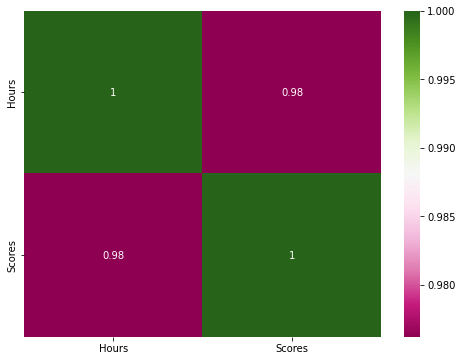

In [14]:
# plot correlation plot
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),cmap='PiYG',annot=True);

## **Find outlier** 

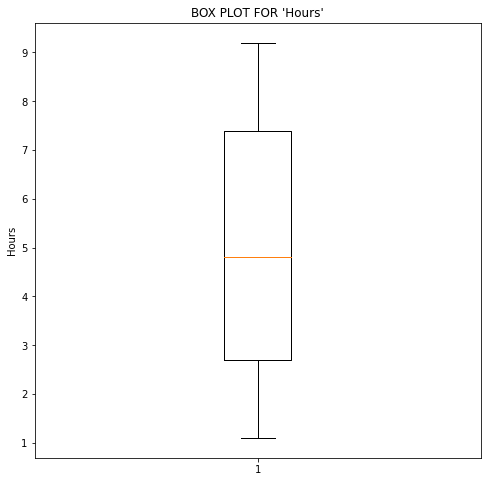

In [15]:
# for outlier in "Hours" column let's plot box plot
plt.figure(figsize=(8,8))
plt.boxplot(dataset["Hours"])
plt.ylabel("Hours")
plt.title("BOX PLOT FOR 'Hours'");

There is no any outlier in "Hours" column

.

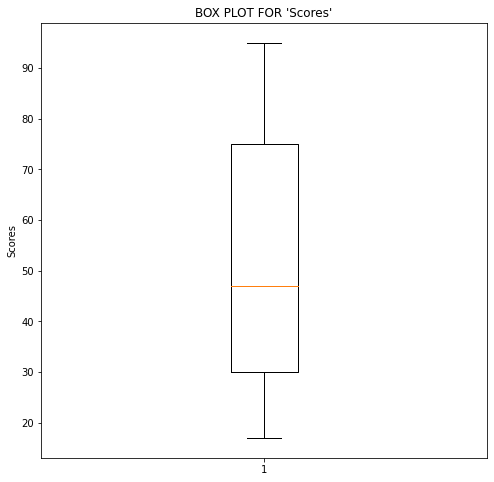

In [16]:
# for outlier in "Scores" column let's plot box plot
plt.figure(figsize=(8,8))
plt.boxplot(dataset["Scores"])
plt.ylabel("Scores")
plt.title("BOX PLOT FOR 'Scores'");

There is no any outlier in "Scores" column

.

## **Splitting the data**

In [17]:
# Here Hours is independent variable 
independent_variable="Hours"

In [18]:
# Here "Scores" is dependent variable
dependent_variable="Scores"


In [19]:
x=dataset[[independent_variable]].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y=dataset[[dependent_variable]].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [21]:
# split our dataset in 80 percent for train and 20 percent for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## **Create the linear regression object**

In [22]:
lr = LinearRegression()
lr

LinearRegression()

## **Train the Model**

In [23]:
# Now train our model by x_train and x_test
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
# coefficient after train our modal
lr.coef_

array([[9.91065648]])

In [25]:
# Intercept after train our modal
lr.intercept_

array([2.01816004])

## **Making Predictions**

In [26]:
# let's make our predictions by using x_test
y_pred=lr.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [27]:
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


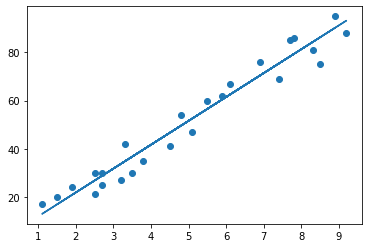

In [28]:
# Visualizing the Model
m=lr.coef_
c=lr.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x, line);

## **Visualising Test Data**

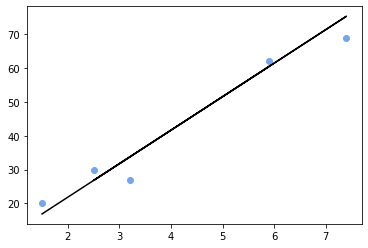

In [29]:
plt.scatter(x_test,y_test , color = "#75a6eb")
plt.plot(x_test,y_pred , color = "black")
plt.show()

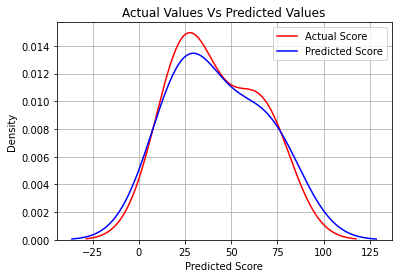

In [30]:
# Plot between Actual Values Vs Predicted Values
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_predict["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_predict["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

## **Accuracy of our modal**

In [31]:
mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

r2=r2_score(y_test,y_pred)
print('r2:',r2)

Mean absolute error: 4.183859899002982
correlation: 0.9515510725211552
r2: 0.9454906892105354


Here we can see r2 score which is 0.945. which is good accuracy score so we can deploy this modal for prediction

.

## **Making Predictions**


To Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

In [32]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]
